# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [ ]:
!kaggle datasets download -d henriqueyamahata/bank-marketing


Dataset URL: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
License(s): other
  0% 0.00/393k [00:00<?, ?B/s]
100% 393k/393k [00:00<00:00, 70.4MB/s]


In [ ]:
!unzip bank-marketing.zip

Archive:  bank-marketing.zip
  inflating: bank-additional-full.csv  
  inflating: bank-additional-names.txt  


In [ ]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Removing duplicates
We can use .drop_duplicates()

In [ ]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Quick View for the the data
We can use .describe() and .info()

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.describe(include= 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [ ]:
df['pdays'].value_counts()

pdays
999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Converting data types
Using .astype()

In [ ]:
df[['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'default', 'housing', 'loan','poutcome' ]] = df[['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'default', 'housing', 'loan','poutcome']].astype('category')
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['y'] = df['y'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

<Axes: >

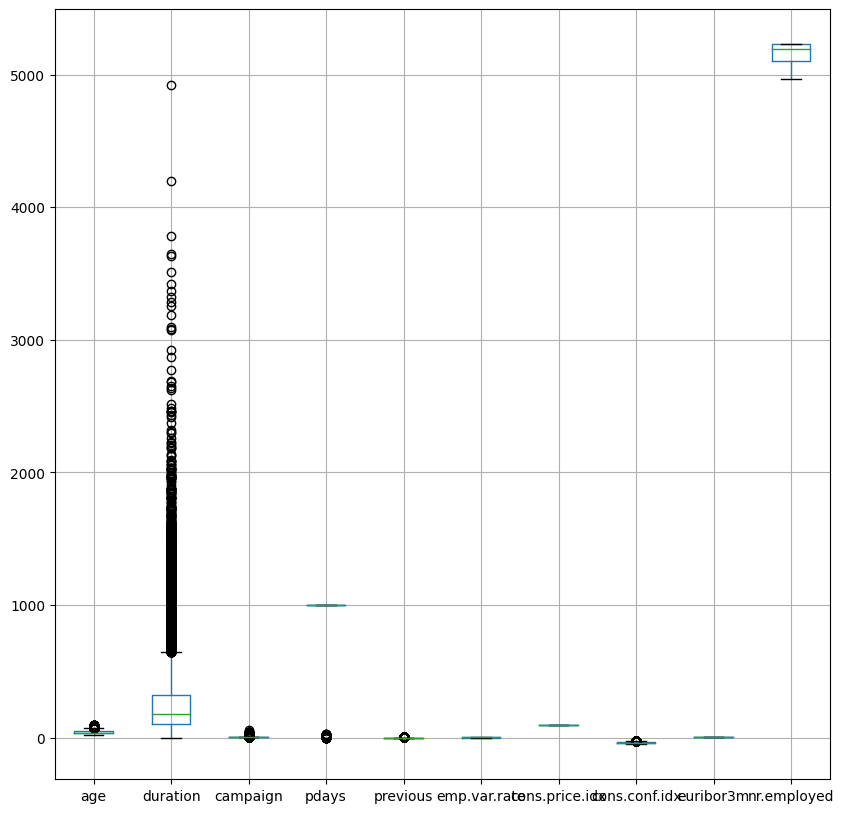

In [ ]:
df.boxplot(figsize = (10, 10))

##  Correct data types
Ensure all columns have the correct data type (string, integer, float, boolean, etc.). You may need to convert some columns using .astype()

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,2,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df['default'].unique()
defult_warper = {'no':0, 'yes':1, 'unknown':2}
df['default'] = df['default'].map(defult_warper)

In [ ]:
df['marital'].unique()
marital_warper = {'married':0, 'single':1, 'divorced':2, 'unknown':3}
df['marital'] = df['marital'].replace(marital_warper)

In [ ]:
df['housing'].unique()
housing_warper = {'no':0, 'yes':1, 'unknown':2}
df['housing'] = df['housing'].map(housing_warper)

In [ ]:
df['loan'].unique()
loan_warper = {'no':0, 'yes':1, 'unknown':2}
df['loan'] = df['loan'].replace(loan_warper)

In [ ]:
df['contact'].unique()
contact_warper = {'telephone':0, 'cellular':1}
df['contact'] = df['contact'].replace(contact_warper).astype('Int8')

In [ ]:
df['poutcome'].unique()
poutcome_warper = {'nonexistent':0, 'failure':1, 'success':2}
df['poutcome'] = df['poutcome'].replace(poutcome_warper)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Fix inconsistent data
Look for inconsistencies in the data, like spelling variations, different

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  string 
 2   marital         41188 non-null  string 
 3   education       41188 non-null  string 
 4   has credit      41188 non-null  int64  
 5   housing loan    41188 non-null  int64  
 6   personal loan   41188 non-null  int64  
 7   contact         41188 non-null  Int8   
 8   month           41188 non-null  string 
 9   day_of_week     41188 non-null  string 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Preprocessing


## Renaming columns
Using .rename()

In [ ]:
df.rename(columns={'default': 'has credit', 'housing': 'housing loan', 'loan': 'personal loan'}, inplace = True)
df.head()

,age,job,marital,education,has credit,housing loan,personal loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Changing column order
Using .reindex()


In [ ]:
df.reindex(columns=['age', 'job', 'marital', 'education', 'housing loan', 'personal loan', 'has credit', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'])

,age,job,marital,education,housing loan,personal loan,has credit,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,0,basic.4y,0,0,0,261,1,999,0,0,True
1,57,services,0,high.school,0,0,2,149,1,999,0,0,True
2,37,services,0,high.school,1,0,0,226,1,999,0,0,True
3,40,admin.,0,basic.6y,0,0,0,151,1,999,0,0,True
4,56,services,0,high.school,0,1,0,307,1,999,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,0,professional.course,1,0,0,334,1,999,0,0,True
41184,46,blue-collar,0,professional.course,0,0,0,383,1,999,0,0,True
41185,56,retired,0,university.degree,1,0,0,189,2,999,0,0,True
41186,44,technician,0,professional.course,0,0,0,442,1,999,0,0,True


## Dropping unnecessary columns
 Use .drop() in pandas.

In [ ]:
columns_to_drop = ['education', 'day_of_week', 'month', 'pdays', 'previous', 'euribor3m', 'emp.var.rate', 'cons.price.idx','cons.conf.idx']
existing_columns = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(existing_columns, axis=1, inplace= True)
df.head()

,age,job,marital,has credit,housing loan,personal loan,contact,duration,campaign,poutcome,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,261,1,nonexistent,5191.0,0
1,57,services,married,unknown,no,no,telephone,149,1,nonexistent,5191.0,0
2,37,services,married,no,yes,no,telephone,226,1,nonexistent,5191.0,0
3,40,admin.,married,no,no,no,telephone,151,1,nonexistent,5191.0,0
4,56,services,married,no,no,yes,telephone,307,1,nonexistent,5191.0,0


## Encoding categorical variables


In [ ]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [ ]:
jop_warper = {'admin.':0, 'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'management':4, 'retired':5, 'self-employed':6, 'services':7, 'student':8, 'technician':9, 'unemployed':10}
df['job'] = df['job'].replace(jop_warper)
df.head()

,age,job,marital,has credit,housing loan,personal loan,contact,duration,campaign,poutcome,nr.employed,y
0,56,3,married,no,no,no,telephone,261,1,nonexistent,5191.0,0
1,57,7,married,unknown,no,no,telephone,149,1,nonexistent,5191.0,0
2,37,7,married,no,yes,no,telephone,226,1,nonexistent,5191.0,0
3,40,0,married,no,no,no,telephone,151,1,nonexistent,5191.0,0
4,56,7,married,no,no,yes,telephone,307,1,nonexistent,5191.0,0


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'has credit'}>,
        <Axes: title={'center': 'housing loan'}>,
        <Axes: title={'center': 'personal loan'}>],
       [<Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'poutcome'}>,
        <Axes: title={'center': 'emp.var.rate'}>,
        <Axes: title={'center': 'cons.price.idx'}>],
       [<Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'y'}>]], dtype=object)

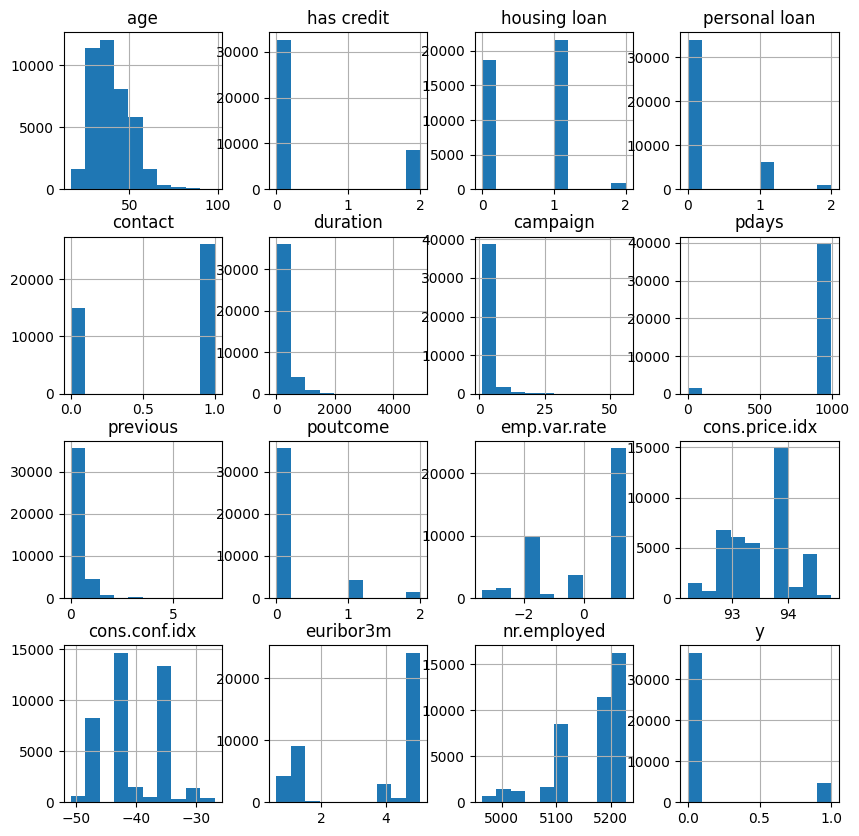

In [ ]:
df.hist(figsize = (10, 10))

## Box plots
Use .boxplot() in pandas to visualize the distribution through quartiles, extremes, and outliers for a numeric variable.

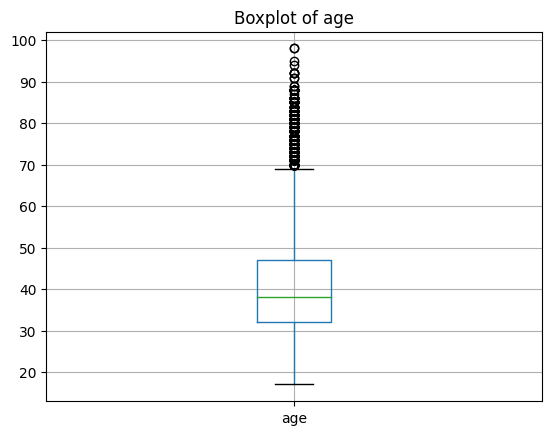

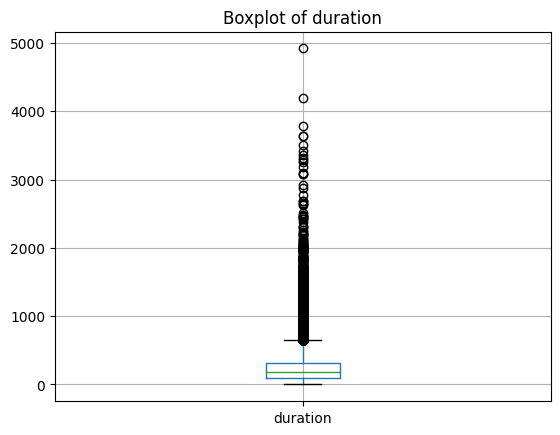

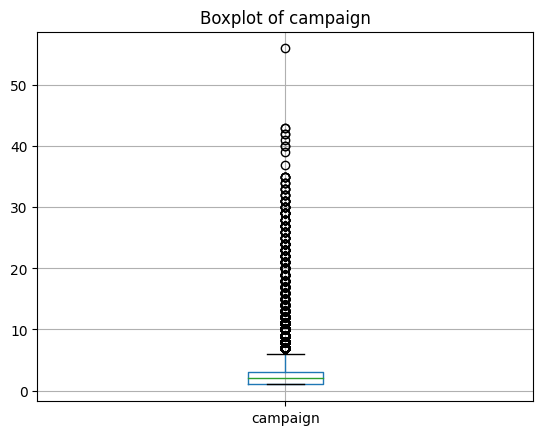

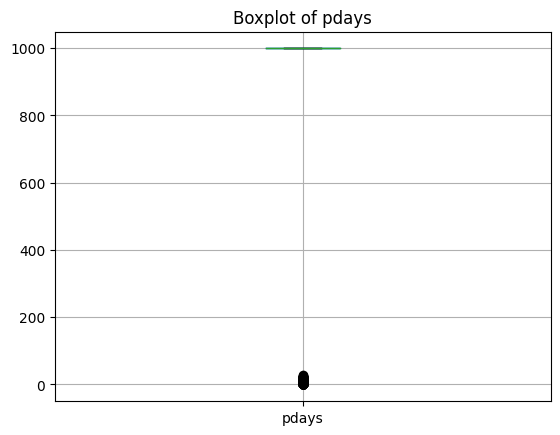

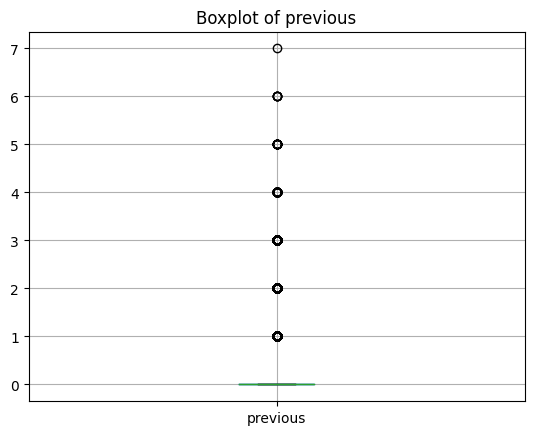

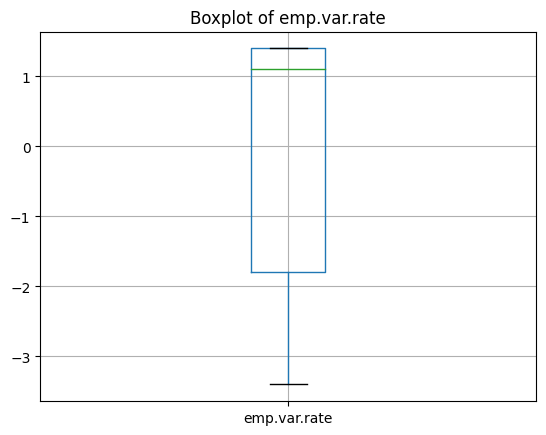

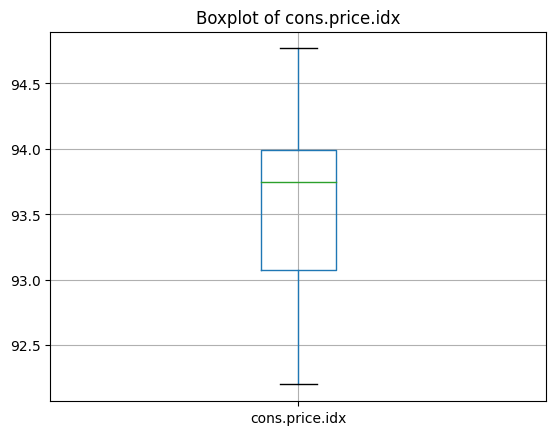

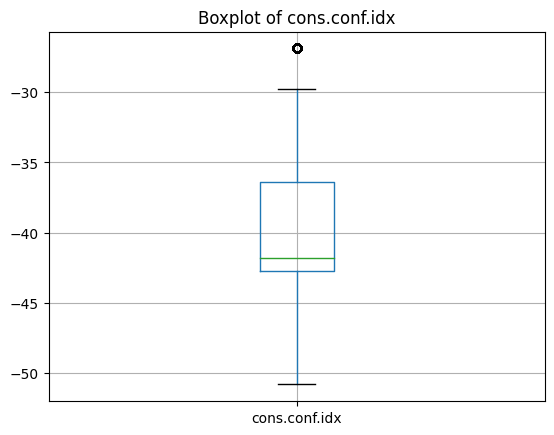

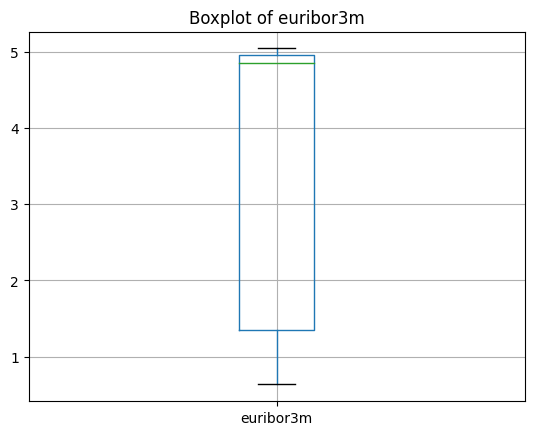

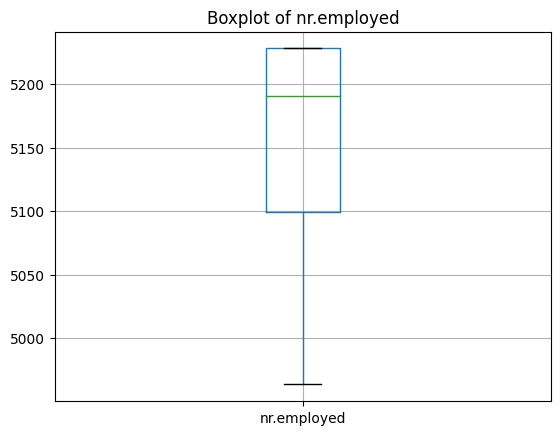

In [ ]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.show()

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

<Axes: xlabel='age', ylabel='duration'>

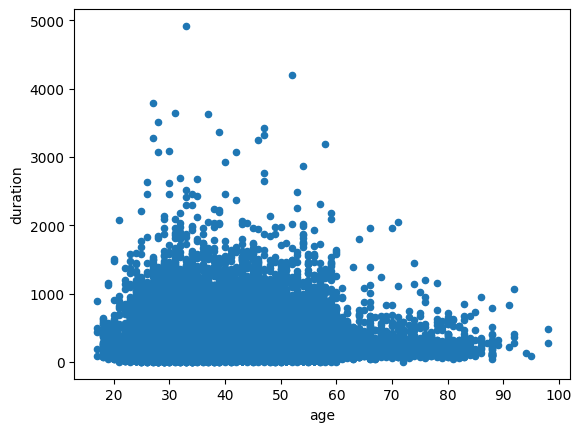

In [ ]:
df.plot(kind='scatter', x='age', y='duration')

## Bar plots
Use .plot(kind=’bar’) to compare categorical variables or the counts of categorical variables. This gives a quick visual summary.

<Axes: xlabel='age'>

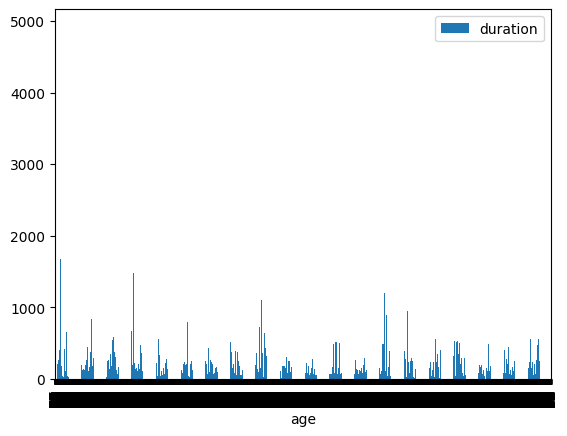

In [ ]:
df.plot(kind='bar', x='age', y='duration')

## Correlation heatmaps
Use a seaborn heatmap() to visualize the correlation between all numeric variables.

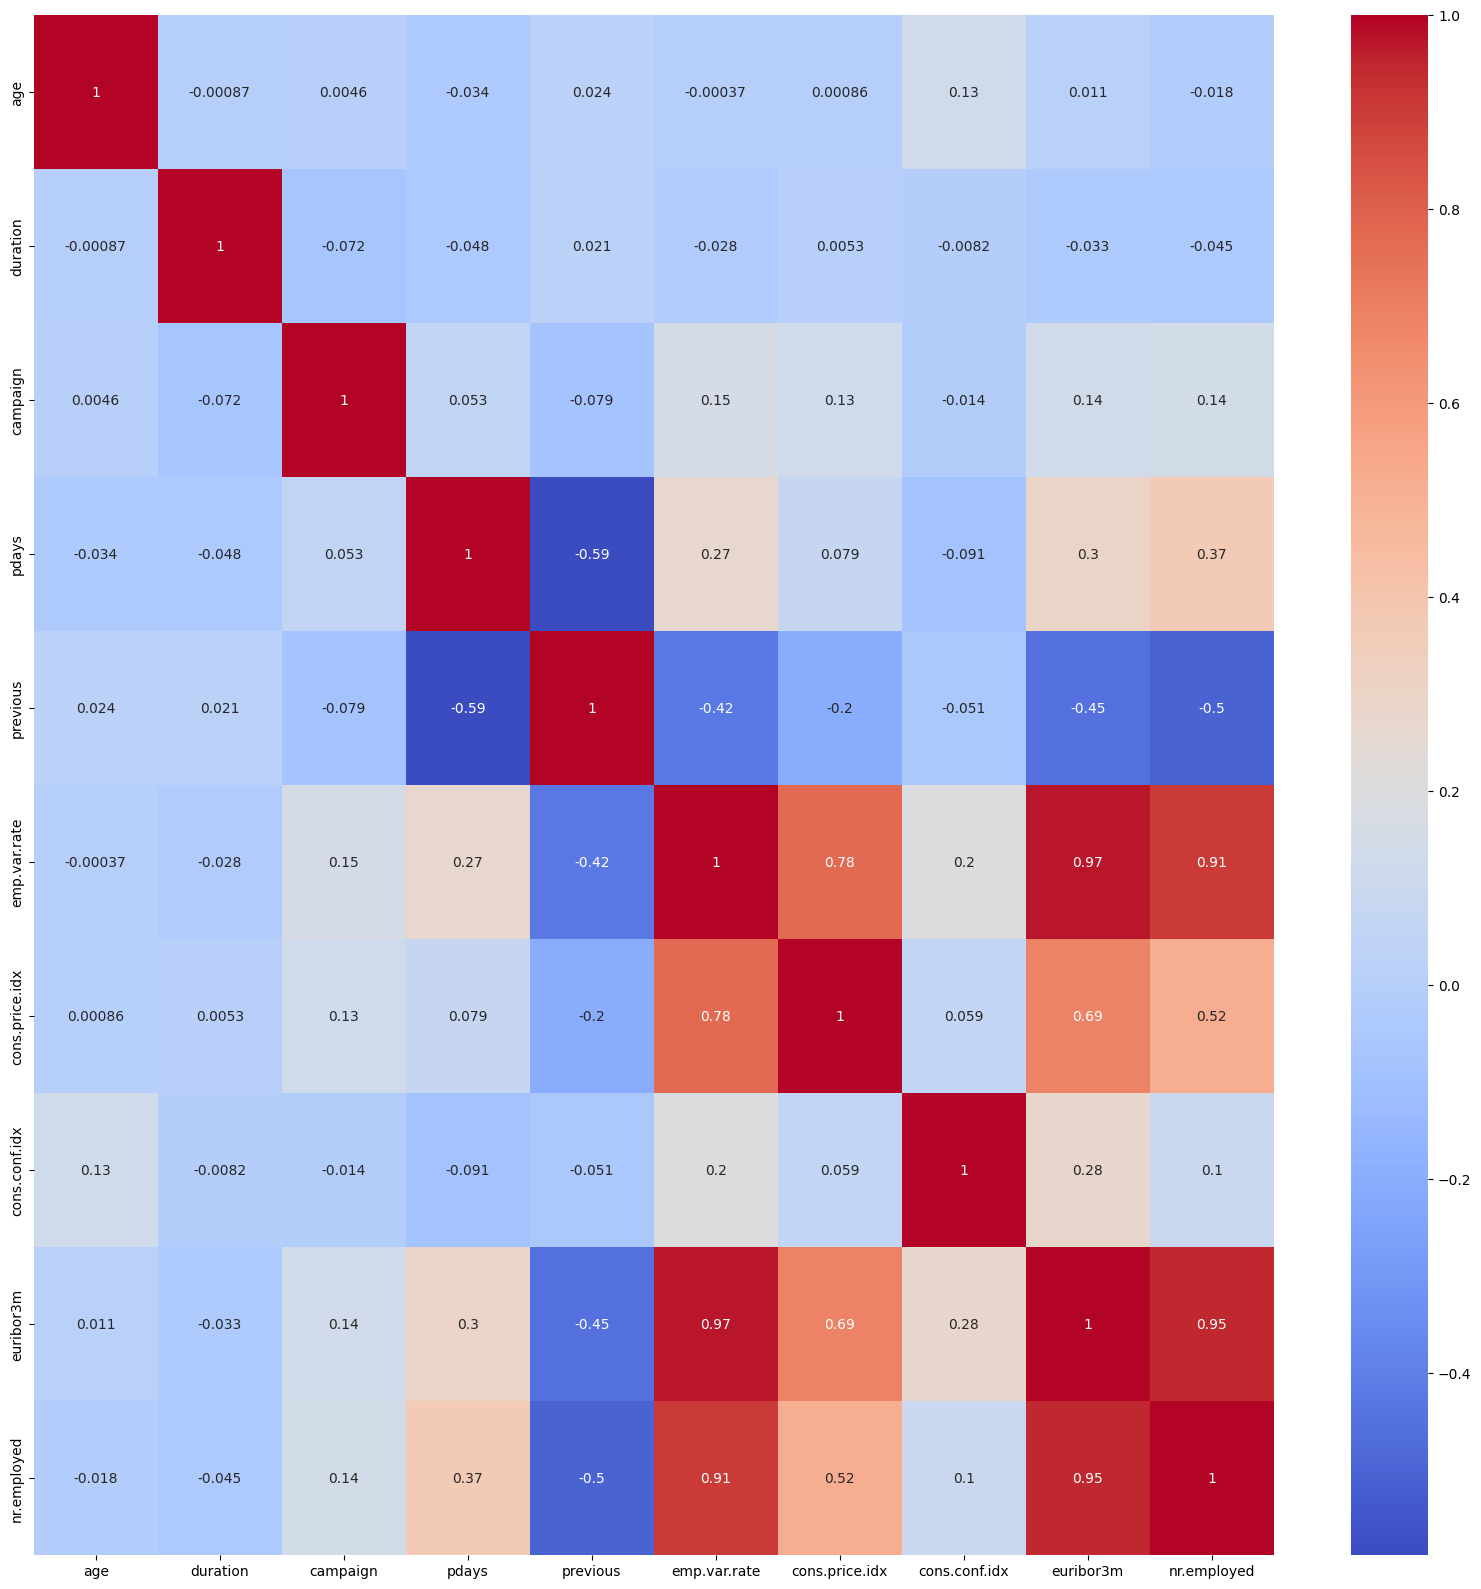

In [ ]:
plt.figure(figsize=(20, 20))

sns.heatmap(df.corr(numeric_only=True),annot = True, cmap= 'coolwarm')
plt.show()

#*models*
logistic regression


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
Y = df['y']
X = df[['age', 'job', 'marital', 'housing loan', 'personal loan', 'has credit', 'duration', 'campaign', 'poutcome']]

print('X =\n', X)
print('Y =\n', Y)

X =
        age job  marital housing loan personal loan has credit  duration  \
0       56   3  married           no            no         no       261   
1       57   7  married           no            no    unknown       149   
2       37   7  married          yes            no         no       226   
3       40   0  married           no            no         no       151   
4       56   7  married           no           yes         no       307   
...    ...  ..      ...          ...           ...        ...       ...   
41183   73   5  married          yes            no         no       334   
41184   46   1  married           no            no         no       383   
41185   56   5  married          yes            no         no       189   
41186   44   9  married           no            no         no       442   
41187   74   5  married          yes            no         no       239   

       campaign     poutcome  
0             1  nonexistent  
1             1  nonexistent  
2

In [ ]:
df

,age,job,marital,has credit,housing loan,personal loan,contact,duration,campaign,poutcome,nr.employed,y
0,56,3,married,no,no,no,telephone,261,1,nonexistent,5191.0,0
1,57,7,married,unknown,no,no,telephone,149,1,nonexistent,5191.0,0
2,37,7,married,no,yes,no,telephone,226,1,nonexistent,5191.0,0
3,40,0,married,no,no,no,telephone,151,1,nonexistent,5191.0,0
4,56,7,married,no,no,yes,telephone,307,1,nonexistent,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,married,no,yes,no,cellular,334,1,nonexistent,4963.6,1
41184,46,1,married,no,no,no,cellular,383,1,nonexistent,4963.6,0
41185,56,5,married,no,yes,no,cellular,189,2,nonexistent,4963.6,0
41186,44,9,married,no,no,no,cellular,442,1,nonexistent,4963.6,1


In [ ]:
# Initializing and fitting the logistic regression model
X_dummies = pd.get_dummies(df[['age', 'job', 'marital', 'housing loan',
                                'personal loan', 'has credit', 'duration',
                                'campaign', 'poutcome']],
                           columns=['age', 'job', 'marital', 'housing loan',
                                    'personal loan', 'has credit', 'duration',
                                    'campaign', 'poutcome'])
X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, test_size=0.3, random_state=0)

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)